In [352]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [353]:
# Uma função apenas para gerar o dataset a partir de uma lista.
# Por exemplo: se a lista for [1, 2, 3, 4, 5], para uma janela=3,
# a saída será: x = [[1, 2, 3], [2, 3, 4]] e y=[4, 5]
def dataset(data, window=1, shuffle=True):
  n = len(data)
  x = []
  y = []
  
  for i in range(n-window):
    x.append(data[i:i+steps])
    y.append(data[i+steps])
    
  if shuffle:
    xy = list(zip(x, y))
    np.random.shuffle(xy)
    x, y = zip(*xy)
    
  x = np.array(x)
  x = x.reshape(x.shape[0], x.shape[1], 1)
  y = np.array(y)
  y = y.reshape(x.shape[0], 1)
  
  return x, y

In [354]:
samples = 100
steps = 1
shuffle = True

n = np.arange(0, samples, 1)
f = np.log(1+n+np.sin(n))

x_train, y_train = dataset(f, steps)
x_test, y_test = dataset(f, steps, shuffle=False)

print(x_train.shape)
print(y_train.shape)

(99, 1, 1)
(99, 1)


In [346]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(steps,1)))
model.add(Dense(1))

In [347]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [348]:
history = model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
99/99 [==============================] - 3s 32ms/step - loss: 31.8986 - acc: 0.0000e+00
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 23.8647 - acc: 0.0000e+00
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 17.1531 - acc: 0.0000e+00
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 12.3092 - acc: 0.0000e+00
Epoch 5/50
99/99 [==============================] - 0s 2ms/step - loss: 8.3051 - acc: 0.0000e+00
Epoch 6/50
99/99 [==============================] - 0s 2ms/step - loss: 4.8681 - acc: 0.0000e+00
Epoch 7/50
99/99 [==============================] - 0s 2ms/step - loss: 3.1306 - acc: 0.0000e+00
Epoch 8/50
99/99 [==============================] - 0s 2ms/step - loss: 2.0538 - acc: 0.0000e+00
Epoch 9/50
99/99 [==============================] - 0s 2ms/step - loss: 1.0354 - acc: 0.0000e+00
Epoch 10/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6415 - acc: 0.0000e+00
Epoch 11/50
99/99 [=====

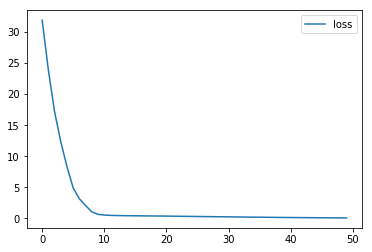

In [349]:
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

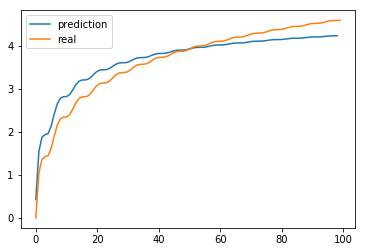

In [351]:
pred = model.predict(x_test)
pred = pred.reshape(pred.shape[0])

plt.plot(pred, label='prediction')
plt.plot(f, label='real')
plt.legend()
plt.show()